# Example: Pruning
------------------

This example shows an advanced example on how to use hyperparameter tuning with pruning.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from optuna.pruners import HyperbandPruner
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Initialize atom
atom = ATOMClassifier(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 141.24 kB
Scaled: False
Outlier values: 167 (1.2%)



In [4]:
# Use ht_params to specify a custom pruner
# Note that pruned trials show the number of iterations it completed
atom.run(
    models="SGD",
    metric="f1",
    n_trials=25,
    ht_params={
        "distributions": ["penalty", "max_iter"],
        "pruner": HyperbandPruner(),
    }
)


Training ========================= >>
Models: SGD
Metric: f1


Running hyperparameter tuning for StochasticGradientDescent...
| trial | penalty | max_iter |      f1 | best_f1 | time_trial | time_ht |    state |
| ----- | ------- | -------- | ------- | ------- | ---------- | ------- | -------- |
| 0     |      l1 |      650 |  0.9558 |  0.9558 |     3.786s |  3.786s | COMPLETE |
| 1     | elast.. |     1050 |  0.9744 |  0.9744 |     8.431s | 12.217s | COMPLETE |
| 2     | elast.. |      500 |  0.9828 |  0.9828 |     0.040s | 12.257s |   PRUNED |
| 3     |    None |      700 |  0.9739 |  0.9828 |     3.873s | 16.130s | COMPLETE |
| 4     |      l1 |     1400 |  0.9735 |  0.9828 |     0.047s | 16.177s |   PRUNED |
| 5     |    None |     1400 |  0.9735 |  0.9828 |     7.163s | 23.340s | COMPLETE |
| 6     |      l2 |     1200 |  0.9825 |  0.9828 |     5.103s | 28.443s | COMPLETE |
| 7     |      l2 |     1250 |  0.9825 |  0.9828 |     5.729s | 34.172s | COMPLETE |
| 8     |    None |    

## Analyze the results

In [5]:
atom.plot_trials()

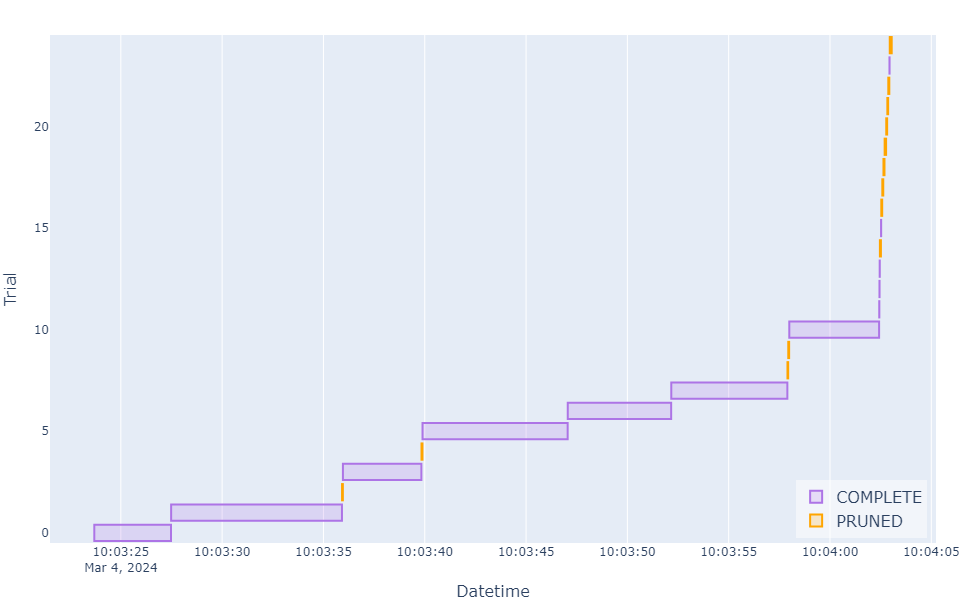

In [7]:
atom.plot_timeline()

In [6]:
atom.plot_hyperparameter_importance()